# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [3]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

display(heroes_df.head())
display(powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop("Unnamed: 0", axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [5]:
display(heroes_df.describe())
display(powers_df.describe())

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Silver Surfer,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

The `heroes_df` dataframe has null values in the `Weight` and `Publisher`.
The strategy chosen for dealing with null values in the `Weight` column is to replace them with the median column value.
The `Publisher` column is a categorical so having null values in this column is not an impediment to further analysis. 
The 'powers_df' dataframe does not contain any null values in any of its columns.

In [8]:
# Presence of null values
display(heroes_df.isna().any())
display(powers_df.isna().any())

name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

hero_names               False
Agility                  False
Accelerated Healing      False
Lantern Power Ring       False
Dimensional Awareness    False
Cold Resistance          False
Durability               False
Stealth                  False
Energy Absorption        False
Flight                   False
Danger Sense             False
Underwater breathing     False
Marksmanship             False
Weapons Master           False
Power Augmentation       False
Animal Attributes        False
Longevity                False
Intelligence             False
Super Strength           False
Cryokinesis              False
Telepathy                False
Energy Armor             False
Energy Blasts            False
Duplication              False
Size Changing            False
Density Control          False
Stamina                  False
Astral Travel            False
Audio Control            False
Dexterity                False
                         ...  
Intuitive aptitude       False
Vision -

In [13]:
# Count of null values
display(heroes_df.isna().sum())
display(powers_df.isna().any().sum())

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

0

In [14]:
# Replace null values in heroes_df Weight column
heroes_df['Weight'].fillna(heroes_df.Weight.median(), inplace=True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [15]:
# Deal with duplicates
heroes_df.drop_duplicates(subset="name", inplace=True)

# Set index
heroes_df.reset_index(drop=True, inplace=True)
powers_df.rename(columns={'hero_names':'name'}, inplace=True)

In [16]:
powers_df = powers_df.astype('str')

In [18]:
# Join
heroes_and_powers_df = heroes_df.set_index('name').join(powers_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

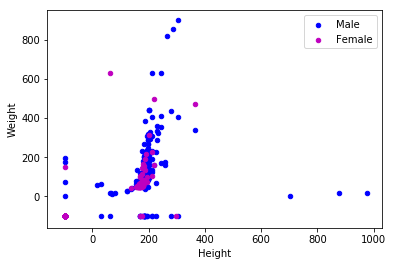

In [22]:
male_df = heroes_df[heroes_df['Gender'] == 'Male']
female_df = heroes_df[heroes_df['Gender'] == 'Female']

ax = male_df.plot.scatter(x="Height", y="Weight", c="b", label="Male")
female_df.plot.scatter(x="Height", y="Weight", c="m", label="Female", ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [25]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title("Distribution of the {} column for {} gendered Heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()

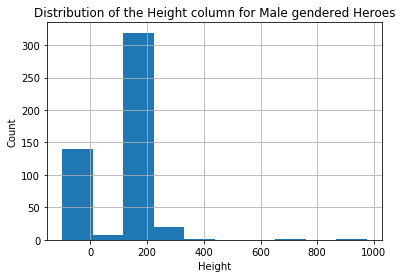

Male Height
---------------------------------
Mean: 109.11201629327903
Median: 180.0


In [26]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')
print('Male Height')
print('---------------------------------')
print('Mean: {}'.format(male_heroes_df.Height.mean()))
print('Median: {}'.format(male_heroes_df.Height.median()))

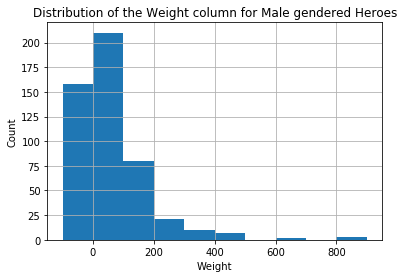

Male Weight
---------------------------------
Mean: 53.55600814663951
Median: 79.0


In [27]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')
print('Male Weight')
print('---------------------------------')
print('Mean: {}'.format(male_heroes_df.Weight.mean()))
print('Median: {}'.format(male_heroes_df.Weight.median()))

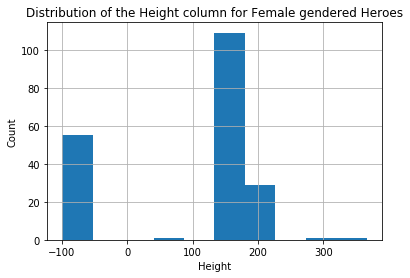

Female Height
---------------------------------
Mean: 97.99234693877551
Median: 168.0


In [28]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')
print('Female Height')
print('---------------------------------')
print('Mean: {}'.format(female_heroes_df.Height.mean()))
print('Median: {}'.format(female_heroes_df.Height.median()))

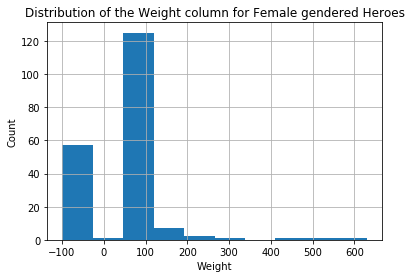

Female Weight
---------------------------------
Mean: 27.433673469387756
Median: 54.0


In [29]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')
print('Female Weight')
print('---------------------------------')
print('Mean: {}'.format(female_heroes_df.Weight.mean()))
print('Median: {}'.format(female_heroes_df.Weight.median()))

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

The distribution of male height has one large peak around 200 and a peak near -100 that is likely made of placeholder values.
The mean is 109. The median is 180.

The distribution of male weight is positively skewed with a median value near 100. 
The mean is 53. The median is 79.

The distribution of female height has one large peak around 150 and a peak near -100 that is likely made of placeholder values.
The mean is 98. The median is 168.

The distribution of female weight has one  large peak around 100 and a peak near -100 that is likely made of placeholder values.
The mean is 27. The median is 54.

The distributions of height and weight for both males and femailes contain curious data points below zero. These outliers are likely placeholder values that do not reflect actual data collected.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [34]:
# Top 5 powers function
def top_5_powers(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    # Convert power values to binary, 1 or 0
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0}) 
    # Return sorted list of top 5
    power_counts = dict(df.sum())    
    return sorted(power_counts.items(), key=lambda x: x[1], reverse=True)[:5] 

In [35]:
# Top 5 powers visualization
def top_5_powers_barchart(top_5_list, publisher=None):
    power_names = [i[0] for i in top_5_list]
    power_values = [i[1] for i in top_5_list]
    plt.clf()
    plt.figure(figsize=(12, 8))
    positions = np.arange(len(power_names))
    plt.bar(positions, power_values)
    plt.xticks(positions, power_names)
    if publisher:
        plt.title('Top 5 Powers in the {} Universe'.format(publisher))
    else:
        plt.title('Top 5 Powers in Overall')
    plt.show()

[('Super Strength', 350), ('Stamina', 281), ('Durability', 251), ('Super Speed', 241), ('Agility', 235)]


<Figure size 432x288 with 0 Axes>

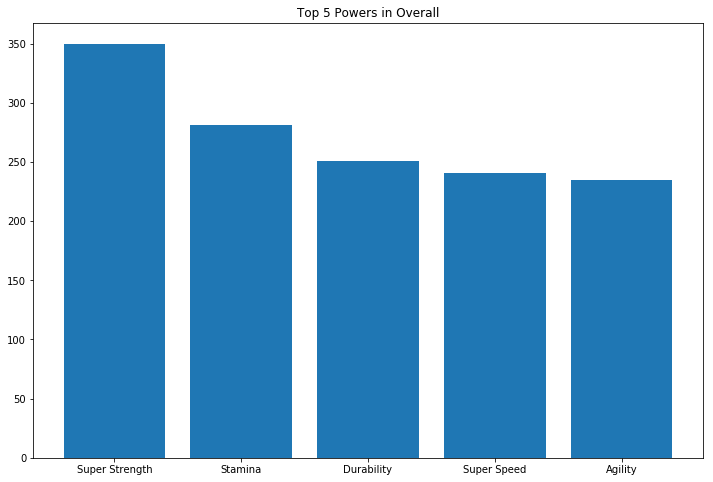

None

In [36]:
 # 5 most common powers overall   
top_5_powers_overall = top_5_powers(heroes_and_powers_df)
print(top_5_powers_overall)
display(top_5_powers_barchart(top_5_powers_overall))

[('Super Strength', 199), ('Durability', 148), ('Stamina', 145), ('Super Speed', 132), ('Agility', 121)]


<Figure size 432x288 with 0 Axes>

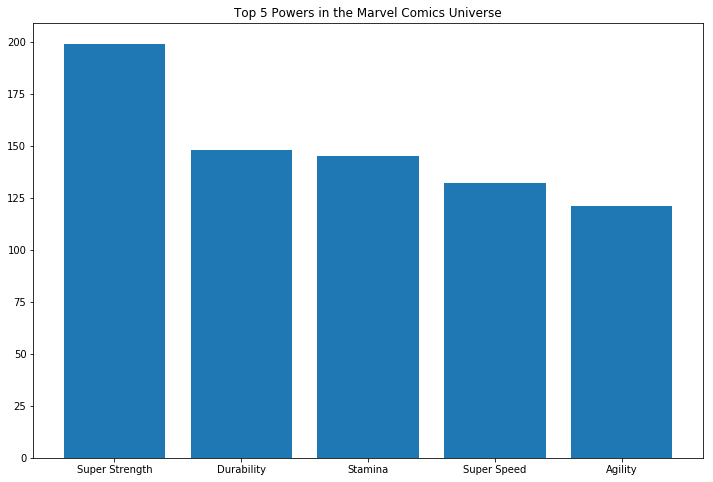

None

In [37]:
# 5 most common powers in the Marvel Universe
marvel_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'Marvel Comics']
top_5_powers_marvel = top_5_powers(marvel_df)
print(top_5_powers_marvel)
display(top_5_powers_barchart(top_5_powers_marvel, publisher="Marvel Comics"))

[('Super Strength', 103), ('Flight', 83), ('Stamina', 83), ('Super Speed', 75), ('Agility', 68)]


<Figure size 432x288 with 0 Axes>

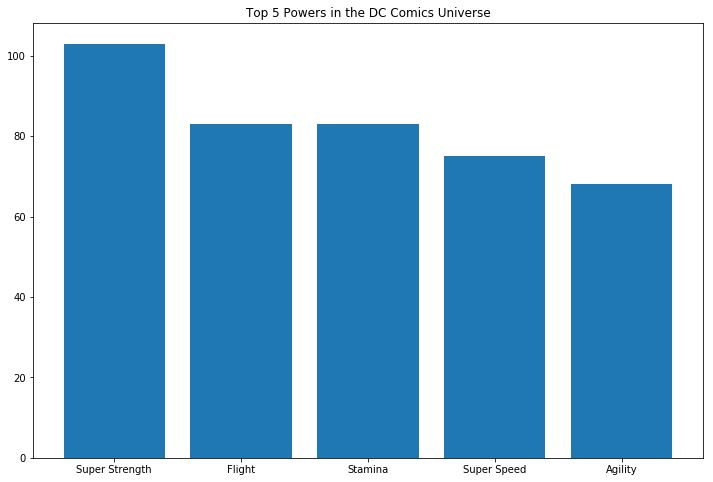

In [38]:
# 5 most common powers in the DC Universe
dc_df = heroes_and_powers_df[heroes_and_powers_df['Publisher'] == 'DC Comics']
top_5_powers_dc = top_5_powers(dc_df)
print(top_5_powers_dc)
top_5_powers_barchart(top_5_powers_dc, publisher="DC Comics")

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

The top 5 powers for Marvel and DC both have Super Strength at no. 1, Stamina at no. 3, Super Speed at no. 4 and Agility at no. 5. Comparing the top 5 powers for Marvel and DC with the entire Superheroes dataset, they all have Super Strength at no. 1, Super Speed at no. 4 and Agility at no. 5. Also, Durability is no. 3 Overall and no. 2 for the Marvel dataset.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [65]:
# Co-occurrence function
def power_cooccurrence(dataframe):
    df = dataframe.drop(heroes_df.columns.values[1:], axis=1)
    columns = df.columns.values
    # Convert power values to binary, 1 or 0
    for col in columns:
        df[col] = df[col].map({"True": 1, "False": 0}) 
    # Return sorted list of top 5
    cooccur = df.T.dot(df)
    return cooccur

In [66]:
# All heroes
coocurrence_overall = power_cooccurrence(heroes_and_powers_df)
i, j = np.triu_indices(len(coocurrence_overall), 1)
pd.Series(coocurrence_overall.values[i, j], coocurrence_overall.index[i] + coocurrence_overall.index[j]
).sort_values(ascending=False)[:10]

DurabilitySuper Strength             222
Super StrengthStamina                214
Super StrengthSuper Speed            214
AgilityStamina                       172
StaminaSuper Speed                   167
AgilitySuper Strength                162
DurabilityStamina                    159
FlightSuper Strength                 143
DurabilitySuper Speed                142
Accelerated HealingSuper Strength    141
dtype: int64

In [67]:
# Male heroes
male_powers_df = heroes_and_powers_df[heroes_and_powers_df['Gender'] == 'Male']
coocurrence_male = power_cooccurrence(male_powers_df)
i, j = np.triu_indices(len(coocurrence_male), 1)
pd.Series(coocurrence_male.values[i, j], coocurrence_male.index[i] + coocurrence_male.index[j]
).sort_values(ascending=False)[:10]

DurabilitySuper Strength             165
Super StrengthStamina                161
Super StrengthSuper Speed            155
StaminaSuper Speed                   129
AgilityStamina                       127
DurabilityStamina                    124
AgilitySuper Strength                113
FlightSuper Strength                 106
Accelerated HealingSuper Strength    105
DurabilitySuper Speed                104
dtype: int64

In [68]:
female_powers_df = heroes_and_powers_df[heroes_and_powers_df['Gender'] == 'Female']
coocurrence_female = power_cooccurrence(female_powers_df)
i, j = np.triu_indices(len(coocurrence_female), 1)
pd.Series(coocurrence_female.values[i, j], coocurrence_female.index[i] + coocurrence_female.index[j]
).sort_values(ascending=False)[:10]

Super StrengthSuper Speed    54
DurabilitySuper Strength     52
Super StrengthStamina        51
AgilitySuper Strength        45
AgilityStamina               44
Super StrengthReflexes       40
StaminaSuper Speed           38
StaminaReflexes              38
DurabilitySuper Speed        37
AgilityReflexes              35
dtype: int64

Question selected:
Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), 
and does this differ by gender?

Answer:
The top five powers that have the highest chance of co-occurring in a hero are - 
1. Durability and Super Strength (222)
2. Super Strength and Stamina (214)
3. Super Strength and Super Speed (214)
4. Agility and Stamina (172)
5. Stamina and Super Speed (167)

The top five powers that have the highest chance of co-occurring in a male hero are - 
1. Durability and Super Strength (165)
2. Super Strength and Stamina (161)                
3. Super Strength and Super Speed (155)           
4. Stamina and Super Speed (129)                  
5. Agility and Stamina (127)       

The top five powers that have the highest chance of co-occurring in a female hero are - 
1. Super Strength and Super Speed (54)
2. Durability and Super Strength (52)
3. Super Strength and Stamina (51)
4. Agility and Super Strength (45)
5. Agility and Stamina (44)

The co-occurrence of powers does differ by gender, as can be seen by the values and their rankings, but both male and female heroes have Durability and Super Strength, Super Strength and Stamina, Stamina and Super Strength, Super Strength and Super Speed, & Agility and Stamina in their top five power co-occurrences.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data